# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [1]:
%pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Empezamos importando librerías

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

c:\Users\Andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [3]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Vemos dimensiones del dataset

In [4]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
len(np.unique(y_test))

10

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
2**8 # niveles de gris

256

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

C:\Users\Andre\AppData\Local\Temp\ipykernel_14556\3096108358.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));


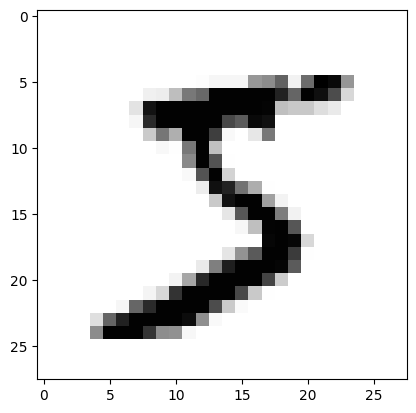

In [8]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [9]:
np.max(X_train)

np.uint8(255)

In [10]:
0/255

0.0

In [11]:
128/255

0.5019607843137255

In [12]:
255/255

1.0

In [13]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [14]:
np.mean(X_train)

np.float32(0.13066047)

In [15]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [17]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [18]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [20]:
28*28

784

In [21]:
X_train.shape

(50000, 28, 28)

In [22]:
model = keras.models.Sequential()

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

c:\Users\Andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [25]:
print(model.layers[0])

<Flatten name=flatten_2, built=True>


Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [33]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [34]:
weights

array([[ 0.03144411, -0.05043789, -0.02490272, ...,  0.04598363,
        -0.06620058,  0.02005477],
       [-0.0407367 , -0.07334483,  0.02617843, ..., -0.02978381,
         0.05249377, -0.05309566],
       [-0.02918757,  0.0172913 , -0.01060949, ..., -0.03820118,
        -0.01484703,  0.02233322],
       ...,
       [-0.02555539,  0.0537449 ,  0.01402103, ..., -0.0555799 ,
        -0.00486952, -0.0736892 ],
       [ 0.03634296, -0.0090012 ,  0.05321269, ...,  0.02275375,
        -0.05968861,  0.07422392],
       [-0.05689637, -0.05143774,  0.05198477, ...,  0.03744292,
         0.01232333, -0.01828647]], shape=(784, 300), dtype=float32)

In [35]:
len(weights)

784

In [36]:
len(weights[0])

300

In [37]:
28*28

784

In [38]:
300*784

235200

In [39]:
weights.size

235200

In [40]:
len(biases)

300

Establecemos la configuración de ejecución... el compile.

In [41]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [42]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [43]:
# Summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
784 * 300 + 300

235500

In [45]:
# 1º neurona de la 1º hidden layer
# y = a + w1*x1 + w2*x2 + .... wn*xn
# a es el intercepto llamado bias
# wn es cada uno de los pesos que va a ir actualizando con el backpropagation
# n es 784
# En la 1º hidden layer tenemos 784 pesos por cada neurona, al tener 300, tenemos un total de:
print(784*300 + 300)

235500


In [46]:
300 * 784 + 300

235500

In [47]:
300 * 100 + 100

30100

In [48]:
100 * 10 + 10

1010

Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [49]:
X_train.shape

(50000, 28, 28)

In [50]:
50000/128

390.625

In [51]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7021 - loss: 1.2411 - val_accuracy: 0.8665 - val_loss: 0.6033
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8695 - loss: 0.5154 - val_accuracy: 0.8981 - val_loss: 0.3959
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8916 - loss: 0.3981 - val_accuracy: 0.9069 - val_loss: 0.3367
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9026 - loss: 0.3493 - val_accuracy: 0.9152 - val_loss: 0.3039
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9096 - loss: 0.3200 - val_accuracy: 0.9215 - val_loss: 0.2844
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9157 - loss: 0.2987 - val_accuracy: 0.9239 - val_loss: 0.2670
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9208 - loss: 0.2818 - val_accuracy: 0.9288 - val_loss: 0.2550
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9245 - loss: 0.2676 - val_accuracy: 0.

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [52]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9773 - loss: 0.0820 - val_accuracy: 0.9728 - val_loss: 0.1015
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9782 - loss: 0.0790 - val_accuracy: 0.9736 - val_loss: 0.0986
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9791 - loss: 0.0760 - val_accuracy: 0.9727 - val_loss: 0.0972
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9797 - loss: 0.0732 - val_accuracy: 0.9724 - val_loss: 0.0989
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9809 - loss: 0.0706 - val_accuracy: 0.9740 - val_loss: 0.0958
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9816 - loss: 0.0680 - val_accuracy: 0.9739 - val_loss: 0.0945
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9820 - loss: 0.0657 - val_accuracy: 0.9738 - val_loss: 0.0910
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9829 - loss: 0.0635 - val_accuracy: 0.

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [53]:
# print(history.params)
# print(history.epoch)
print(history.history)

{'accuracy': [0.7020800113677979, 0.8694599866867065, 0.8916000127792358, 0.9025999903678894, 0.909600019454956, 0.9157199859619141, 0.9208400249481201, 0.9244599938392639, 0.9281200170516968, 0.9309599995613098, 0.9338399767875671, 0.9371399879455566, 0.9390000104904175, 0.9410200119018555, 0.9426400065422058, 0.9449399709701538, 0.9463000297546387, 0.9479799866676331, 0.9495199918746948, 0.9510999917984009, 0.9524400234222412, 0.9538999795913696, 0.9553599953651428, 0.9566199779510498, 0.9577000141143799, 0.9592000246047974, 0.9602400064468384, 0.9614199995994568, 0.9620800018310547, 0.9632800221443176, 0.9643200039863586, 0.9656400084495544, 0.9663599729537964, 0.9674599766731262, 0.9682400226593018, 0.9688799977302551, 0.9697399735450745, 0.970740020275116, 0.9710400104522705, 0.9718000292778015, 0.9722599983215332, 0.9727399945259094, 0.9736400246620178, 0.9738399982452393, 0.9745799899101257, 0.9757599830627441, 0.9758399724960327, 0.9765400290489197, 0.9771000146865845, 0.977479

In [54]:
history.history

{'accuracy': [0.7020800113677979,
  0.8694599866867065,
  0.8916000127792358,
  0.9025999903678894,
  0.909600019454956,
  0.9157199859619141,
  0.9208400249481201,
  0.9244599938392639,
  0.9281200170516968,
  0.9309599995613098,
  0.9338399767875671,
  0.9371399879455566,
  0.9390000104904175,
  0.9410200119018555,
  0.9426400065422058,
  0.9449399709701538,
  0.9463000297546387,
  0.9479799866676331,
  0.9495199918746948,
  0.9510999917984009,
  0.9524400234222412,
  0.9538999795913696,
  0.9553599953651428,
  0.9566199779510498,
  0.9577000141143799,
  0.9592000246047974,
  0.9602400064468384,
  0.9614199995994568,
  0.9620800018310547,
  0.9632800221443176,
  0.9643200039863586,
  0.9656400084495544,
  0.9663599729537964,
  0.9674599766731262,
  0.9682400226593018,
  0.9688799977302551,
  0.9697399735450745,
  0.970740020275116,
  0.9710400104522705,
  0.9718000292778015,
  0.9722599983215332,
  0.9727399945259094,
  0.9736400246620178,
  0.9738399982452393,
  0.9745799899101257,


In [55]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [56]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.70208,1.241135,0.8665,0.603340
1,0.86946,0.515403,0.8981,0.395869
2,0.89160,0.398106,0.9069,0.336721
3,0.90260,0.349284,0.9152,0.303881
4,0.90960,0.320003,0.9215,0.284436
5,0.91572,0.298721,0.9239,0.267003
6,0.92084,0.281847,0.9288,0.254992
7,0.92446,0.267553,0.9308,0.242394
8,0.92812,0.255004,0.9346,0.233736
9,0.93096,0.244024,0.9375,0.223581


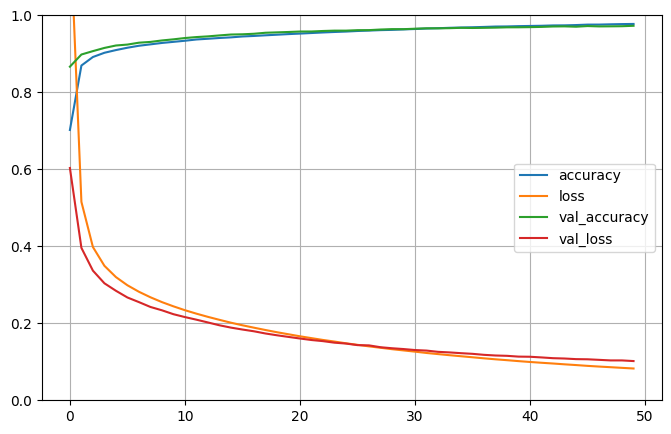

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [58]:
results = model.evaluate(X_test, y_test)
results

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9735 - loss: 0.0871


[0.08713898807764053, 0.9735000133514404]

C:\Users\Andre\AppData\Local\Temp\ipykernel_14556\1468152043.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


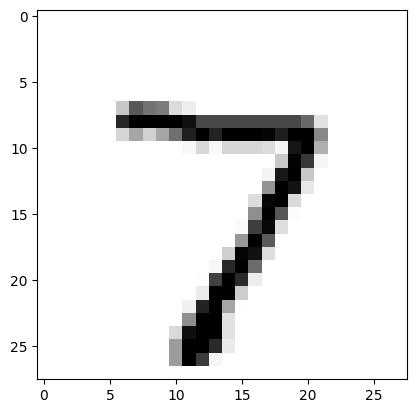

In [59]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [60]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [61]:
predictions = model.predict(X_test[:1])
print(predictions.shape)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
(1, 10)


array([[1.3743246e-05, 4.2021253e-07, 2.3291074e-04, 2.6614240e-03,
        1.2134690e-07, 8.3314726e-06, 3.5030726e-10, 9.9702942e-01,
        1.1905989e-05, 4.1708532e-05]], dtype=float32)

In [66]:
predictions.argmax()

np.int64(7)

In [67]:
model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 865us/step


array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

C:\Users\Andre\AppData\Local\Temp\ipykernel_14556\4029188365.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.imshow(X_test[1].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));


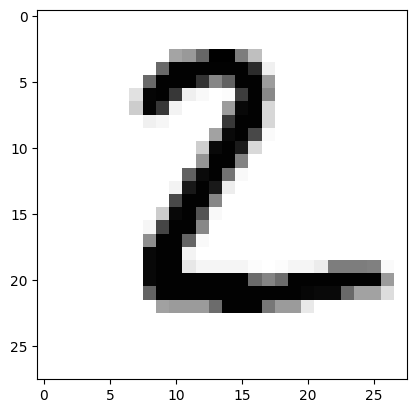

In [68]:
plt.imshow(X_test[1].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 721us/step


array([[ 969,    0,    1,    0,    2,    0,    3,    1,    2,    2],
       [   0, 1121,    4,    0,    0,    1,    4,    2,    3,    0],
       [   5,    1, 1009,    1,    2,    0,    1,    7,    6,    0],
       [   0,    0,    6,  984,    0,    5,    0,    6,    7,    2],
       [   1,    0,    5,    1,  956,    0,    2,    2,    2,   13],
       [   5,    0,    0,    6,    2,  862,    8,    1,    5,    3],
       [   6,    3,    2,    1,    7,    3,  931,    0,    5,    0],
       [   1,    6,   12,    3,    0,    0,    0,  998,    2,    6],
       [   5,    0,    5,    6,    5,    5,    5,    4,  937,    2],
       [   6,    4,    0,    8,    9,    3,    1,    7,    3,  968]])

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [70]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [71]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [72]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [73]:
11610/32

362.8125

In [74]:
X_train.shape

(11610, 8)

In [75]:
X_train.shape[1:]

(8,)

In [76]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error",
             optimizer = "sgd")

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
  1/363 ━━━━━━━━━━━━━━━━━━━━ 44s 124ms/step - loss: 7.8743

c:\Users\Andre\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.9324 - val_loss: 0.6376
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step - loss: 0.7660 - val_loss: 0.5382
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.4956 - val_loss: 0.5026
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - loss: 0.4696 - val_loss: 0.4927
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - loss: 0.4605 - val_loss: 0.4744
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 0.4517 - val_loss: 0.4774
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 963us/step - loss: 0.4425 - val_loss: 0.4594
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4338 - val_loss: 0.4524
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 0.4343 - val_loss: 0.4500
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 0.4244 - val_loss: 0.4433
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 972us/step - loss: 0.4163 - val_loss: 0.4374
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 9

In [77]:
8*30 + 30

270

In [78]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [79]:
8*30+30

270

In [80]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 0.3814
0.38140738010406494


In [ ]:
y_pred = model.predict(X_test[:5])
y_pred

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [ ]:
model.save("my_keras_model.keras")

In [ ]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.keras")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.keras")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10)
history = model.fit(X_train,
                   y_train,
                   epochs=50,
                   validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb, checkpoint_cb])

In [ ]:
history_df = pd.DataFrame(history.history).plot()